In [3]:
from pathlib import Path
import math

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [13]:
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-dark')
# plt.style.available
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load the CSV file
df = pd.read_csv('gbpusd.csv', index_col=0, parse_dates=True, dayfirst=True)['2011':'2023']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0
...,...,...,...,...,...,...
2023-01-13,1.221643,1.224695,1.215185,1.221777,1.221777,0.0
2023-01-16,1.222464,1.228864,1.217434,1.222673,1.222673,0.0
2023-01-17,1.220882,1.229982,1.217063,1.220778,1.220778,0.0


In [45]:
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='Date', length=3144, freq=None)

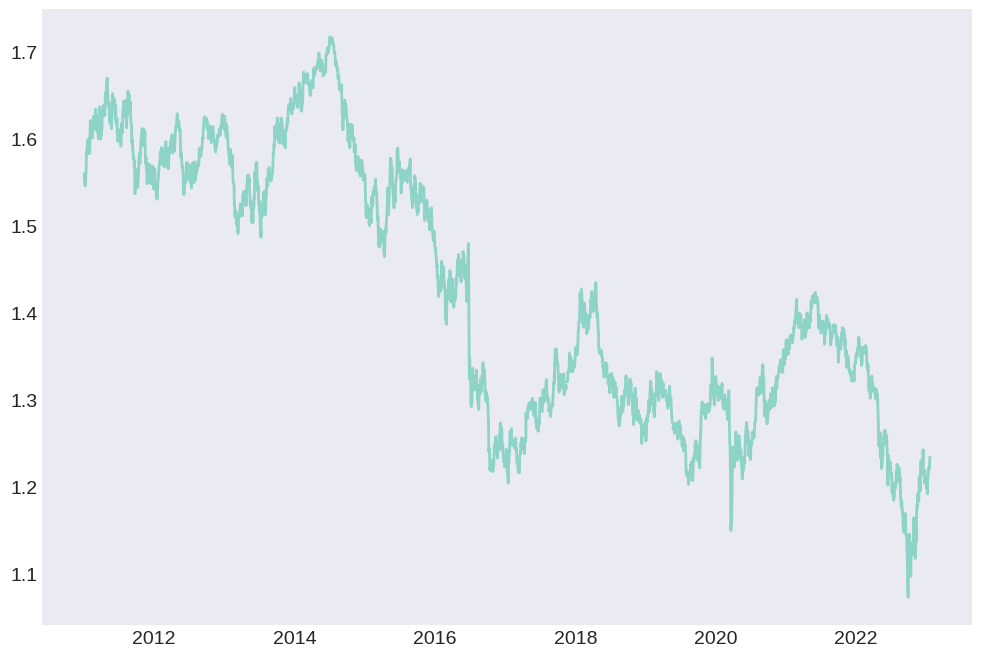

In [20]:
plt.plot(df.index, df['Adj Close'])

In [22]:
# Calculate returns and add it to existing DataFrame as a column
df['Return'] = df['Adj Close'].pct_change().fillna(0)
# Get first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940


In [23]:
# Calculate mean and sigma
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])
mu, sigma

(-5.8101830257450726e-05, 0.005655464234175417)

In [29]:
def zscore(returns):
    zs = (returns - np.mean(returns))/np.std(returns)
    return zs

In [30]:
# Calculate the scaled return : zscore
df['Scaled_Return'] = (df['Return'] - mu) / sigma
# Check the output
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000,0.010274
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313,-0.929099
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988,1.245869
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507,-0.963499
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940,-0.686313


In [31]:
# Calculate minimum and maximum bin range
sr_min = np.min(df['Scaled_Return'])
sr_max = np.max(df['Scaled_Return'])
sr_min, sr_max

(-13.434929545274647, 5.451295057860446)

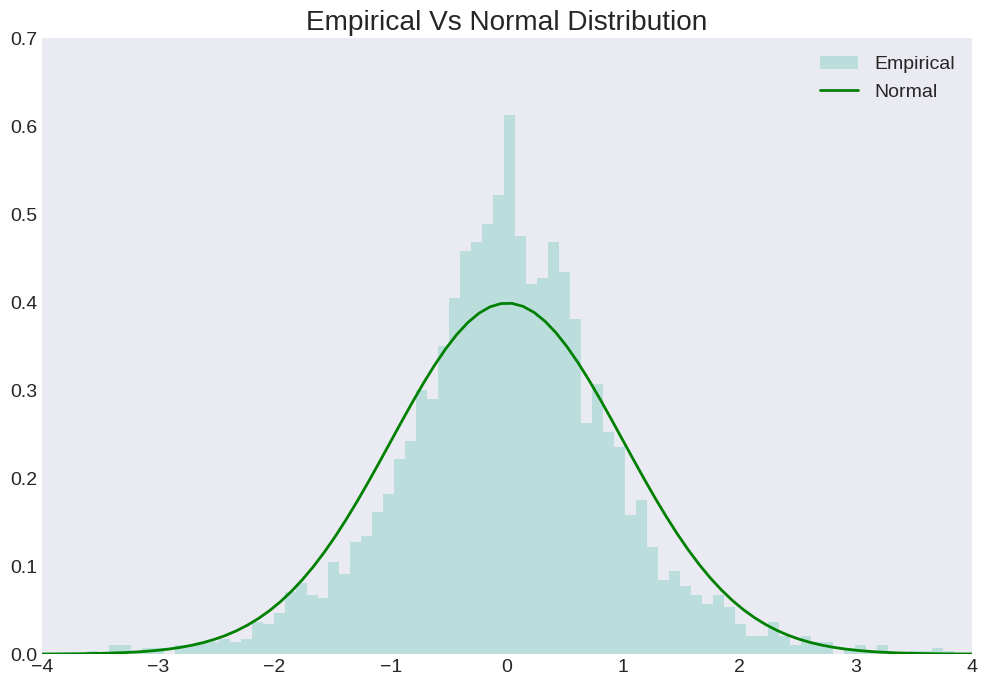

In [43]:
# Define bins - x
x = np.linspace(sr_min, sr_max, 200)
# Calculate normal probability density function - y
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))
# Plot histogram of scaled returns
plt.hist(df['Scaled_Return'], bins=200, density=True, label='Empirical', alpha=0.5)
# Plot norm pdf
plt.plot(x,y, color='green', label='Normal', alpha=1.0)
# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.7)
# Set title
plt.title('Empirical Vs Normal Distribution')
# Set legends
plt.legend()
plt.show()